# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [2]:
data["plot"] = True

data['min_llema_angle'] = 0

data['pl_move_trail_trigger']       = 0.0040
data['stop_loss_pip']               = -0.0040

data['angle_len']       = 200

data['take_profit_method']  = 'simple'
data['stop_loss_method']    = 'simple'

In [3]:
%%time
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

100%|██████████████████████████████▉| 1873853/1879207 [30:52<00:36, 147.09it/s]

pls    0.00413
dtype: float64
--------------------------------------
                  date ord_types  llema_angle               close_type  \
42 2021-03-26 14:21:18     short         -2.0  simple_slema_move_close   
43 2021-03-26 19:10:17     short         -0.0               sema_close   
44 2021-03-28 23:02:14      long          0.0               sema_close   
45 2021-03-29 03:13:22     short         -0.0  simple_slema_move_close   
46 2021-03-29 08:14:05      long          0.0               sema_close   
47 2021-03-29 09:54:03     short         -1.0  simple_slema_move_close   
48 2021-03-29 13:49:53      long          0.0  simple_slema_move_close   
49 2021-03-29 14:36:24     short         -1.0               sema_close   
50 2021-03-29 14:49:31      long          0.0               sema_close   
51 2021-03-29 17:04:02     short         -1.0  simple_slema_move_close   
52 2021-03-30 00:15:07     short         -1.0  simple_slema_move_close   
53 2021-03-30 23:25:21     short         -4

100%|██████████████████████████████| 1879207/1879207 [30:52<00:00, 1014.43it/s]

Wall time: 45min 18s


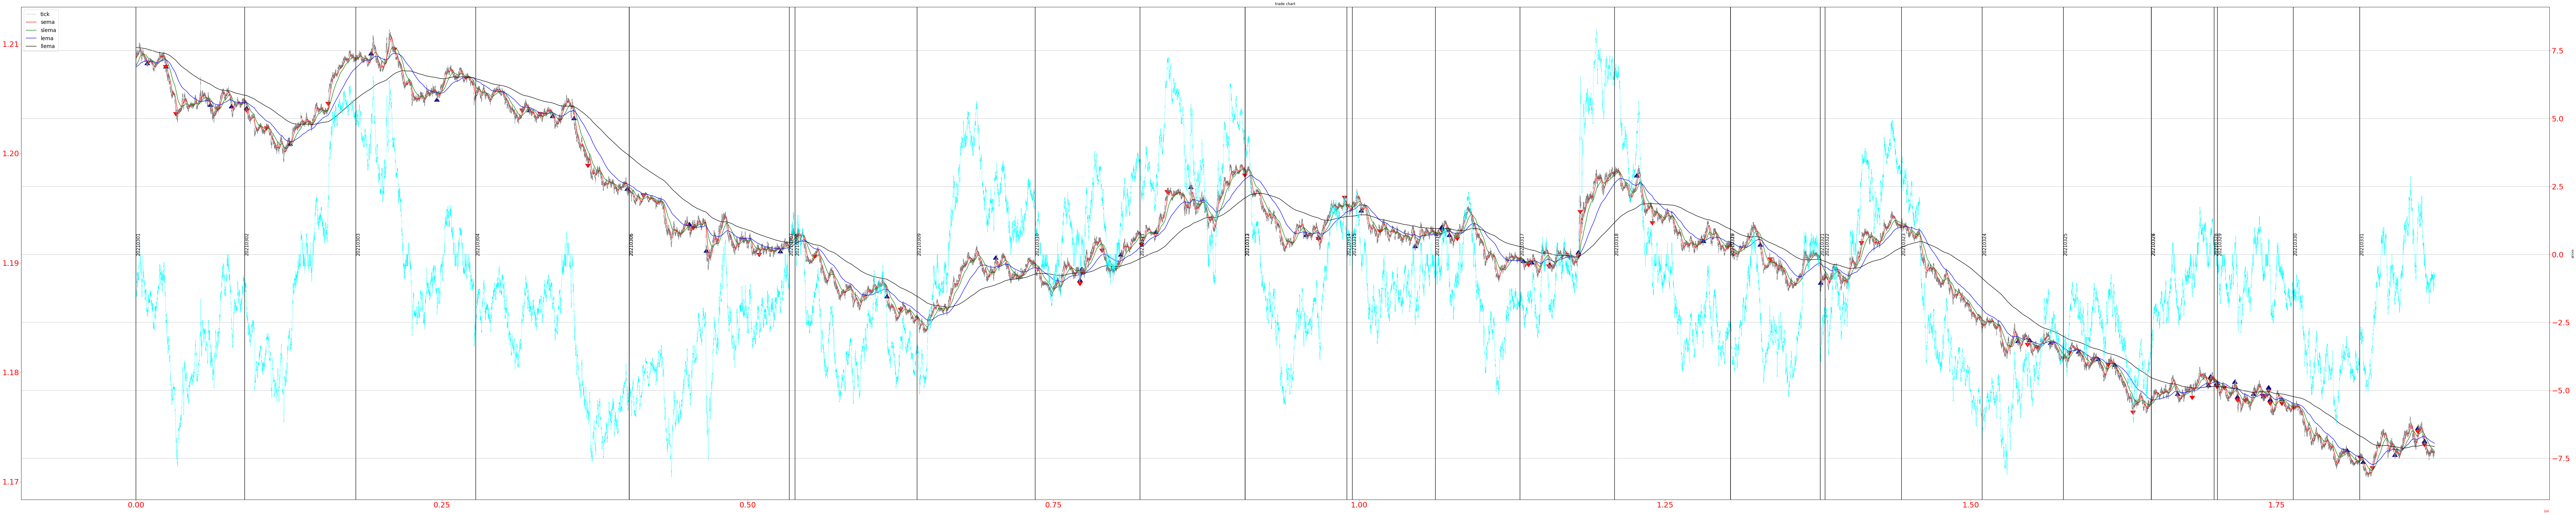

-----------------------------------------------------
date_val          : ['20210301', '20210302', '20210303', '20210304', '20210305', '20210306', '20210307', '20210308', '20210309', '20210310', '20210311', '20210312', '20210313', '20210314', '20210315', '20210316', '20210317', '20210318', '20210319', '20210320', '20210321', '20210322', '20210323', '20210324', '20210325', '20210326', '20210327', '20210328', '20210329', '20210330', '20210331']
Total PL : 0.004129999999999993
-------------
net_pl            : 0.00413/0.06475
-------------
+ve               : num= 42    sum= +0.03444    avg= +0.00082
-ve               : num= 15    sum= -0.03031    avg= -0.00202
-----------------------------------------------------
month_val
3    0.00413
Name: pls, dtype: float64
-----------------------------------------------------
simple_slema_move_close    37
sema_close                 11
simple_take_profit          5
simple_stop                 4
Name: close_type, dtype: int64
-------------------------

In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['month_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['close_type'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)

import glob

for file in glob.glob("data/*.csv"):
    if file not in ['data\\eurusd_2021.csv', 'data\\full_df.csv']:
        df = pd.read_csv(file)
        print('----------------------------')
        print(f'file : {file}')
        print(df['pls'].sum())
        print(df.groupby(['month_val'])['pls'].sum())
        print('----------------------------')